In [66]:

import pandas as pd

X_train = pd.read_csv('../../data/representation.eng.train.csv').to_numpy()
y_train = pd.read_csv('../../data/true_labels.eng.train.csv')

X_test = pd.read_csv('../../data/representation.eng.testa.csv').to_numpy()
y_test = pd.read_csv('../../data/true_labels.eng.testa.csv')

X_test2 = pd.read_csv('../../data/representation.eng.testb.csv').to_numpy()
y_test2 = pd.read_csv('../../data/true_labels.eng.testb.csv')


## Logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

print (y_test)

              precision    recall  f1-score   support

       I-LOC       0.88      0.81      0.84        78
      I-MISC       0.82      0.57      0.67        58
       I-ORG       0.77      0.79      0.78        84
       I-PER       0.95      0.96      0.96       110
           O       0.98      1.00      0.99      1669

    accuracy                           0.97      1999
   macro avg       0.88      0.82      0.85      1999
weighted avg       0.96      0.97      0.96      1999

['O' 'O' 'O' ... 'O' 'O' 'O']


## Neural network 

In [68]:
def get_classes(*datasets):
    classes = set()
    for data in datasets:
        classes.update(data)
    return sorted(classes)

def encode(y, classes, class_to_index):
    n_samples = len(y)
    n_classes = len(classes)
    one_hot_encoded = [[0] * n_classes for _ in range(n_samples)]

    for idx, label in enumerate(y):
        if label in class_to_index:  
            class_idx = class_to_index[label]
            one_hot_encoded[idx][class_idx] = 1

    return one_hot_encoded

all_classes = get_classes(y_train, y_test, y_test2)

class_to_index = {cls: idx for idx, cls in enumerate(all_classes)}

y_train_encoded = encode(y_train, all_classes, class_to_index)
y_test_encoded = encode(y_test, all_classes, class_to_index)
y_test2_encoded = encode(y_test2, all_classes, class_to_index)


In [77]:
print(X_train.shape)

(9999, 768)


In [88]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.layers import Input


vocab_size = X_train.shape[0]

y_train_encoded = np.array(y_train_encoded)
y_test_encoded = np.array(y_test_encoded)
y_test2_encoded = np.array(y_test2_encoded)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test2 = scaler.transform(X_test2)

embedding_dim = 128
lstm_units = 64
num_classes = 7

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 128)            │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,143 (418.53 KB)

 Trainable params: 107,143 (418.53 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
from keras.callbacks import ModelCheckpoint


history = model.fit(X_train, y_train_encoded,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test_encoded),
                    callbacks=[])

loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8914 - loss: 0.3969 - val_accuracy: 0.9480 - val_loss: 0.1469
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9783 - loss: 0.0723 - val_accuracy: 0.9605 - val_loss: 0.1280
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9899 - loss: 0.0372 - val_accuracy: 0.9590 - val_loss: 0.1295
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9923 - loss: 0.0278 - val_accuracy: 0.9640 - val_loss: 0.1192
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9968 - loss: 0.0129 - val_accuracy: 0.9630 - val_loss: 0.1524
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9977 - loss: 0.0103 - val_accuracy: 0.9630 - val_loss: 0.1614
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9981 - loss: 0.0071 - val_accuracy: 0.9680 - val_loss: 0.1442
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9991 - loss: 0.0045 - val_accuracy: 0.

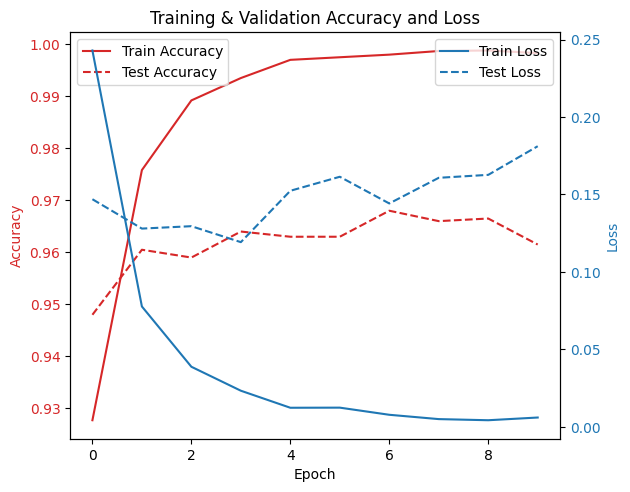

In [91]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(history.history['accuracy'], label='Train Accuracy', color=color)
ax1.plot(history.history['val_accuracy'], label='Test Accuracy', color=color, linestyle='dashed')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Loss', color=color)  
ax2.plot(history.history['loss'], label='Train Loss', color=color)
ax2.plot(history.history['val_loss'], label='Test Loss', color=color, linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  
plt.title('Training & Validation Accuracy and Loss')
plt.show()

